### Notation et présentation
Ce premier notebook est consacré aux méthodes de Programmation Dynamique pour la résolution de Processus de Décision Markoviens (MDP). Ces approches, dites Model-Based, reposent fondamentalement sur les équations de Bellman et nécessitent une connaissance exhaustive de l'environnement (modèle de transition et fonction de récompense) pour calculer une solution optimale. On commence par rappeler les différentes notations des éléments manipulés.

---


#### Politique
La politique définit le comportement de l'agent lorsqu'il se trouve dans un état donné. Le but du RL est de déterminer la **politique optimale** $\pi^*$, c'est-à-dire de trouver les actions à réaliser pour maximiser son profit.
$$\pi(a \mid s) = P(A_{t+1} = a \mid S_t = s)$$
On est en réalité souvent face à une **politique déterministe**, c'est-à-dire que cette probabilité vaut 1. On peut néanmoins se retrouver, même dans un environnement déterministe, avec une politique qui ne l'est pas : par exemple si deux actions sont aussi bonnes l'une que l'autre, ou si on ne prend pas toujours la meilleure action.

#### Revenu
Comme son nom l'indique, c'est ce que l'on va gagner au cours des interactions avec l'environnement. On définit le gain cumulé (ou retour) $G_t$ comme la somme des récompenses futures pondérées par le facteur d'escompte :

$$G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$

$\gamma \in [0, 1]$ est un paramètre à ajuster qui valorise plus ou moins les futures récompenses $R_t$ gagnées par l'action $A_t$ dans un environnement dans un état $S_t$. 

#### Valeur d'état
Cette fonction a pour but d'évaluer la valeur d'un état de l'environnement (par exemple, si on est proche de la case de sortie d'un labyrinthe, c'est très bien et cette case a une forte valeur). Le but est d'évaluer si se retrouver dans une configuration donnée est bénéfique ou non pour l'agent et, si oui, à quel point.

$$V_{\pi}(s) = \mathbb{E}_{\pi}[G_t \mid S_t = s]$$

On remarque à travers cette expression que cela traduit ce qui était dit précédemment : on prend l'espérance des gains futurs selon la politique suivie. Si une case est favorable, cette quantité sera plus élevée.

#### Valeur de l'action
Ici, on n'évalue plus un état seul, mais une action effectuée dans un état donné de l'environnement. Cette fonction aide à déterminer une politique ou sert de base pour évaluer la valeur d'état $V$.

$$q_{\pi}(s, a) = \mathbb{E}_{\pi}[G_t \mid S_t = s, A_t = a]$$



Cette expression représente l'espérance du gain cumulé si l'agent choisit l'action $a$ dans l'état $s$, puis suit la politique $\pi$ pour toutes les étapes suivantes.

--- 

#### Optimalité
Les différentes quantités précédentes peuvent être prises de manière à être optimales vis-à-vis de l'environnement, afin de maximiser nos gains. Une fonction de valeur est optimale lorsqu'elle correspond au gain maximum atteignable à partir d'un état (ou d'un couple état-action) sous la meilleure politique possible.

**Valeur d'état optimale :**
$$V^*(s) = \max_{\pi} V_{\pi}(s)$$

**Valeur d'action optimale :**
$$q^*(s, a) = \max_{\pi} Q_{\pi}(s, a)$$

#### Politique optimale
La politique optimale $\pi^*$ est celle qui permet d'atteindre les valeurs optimales mentionnées précédemment. Elle consiste à choisir systématiquement l'action qui maximise le gain futur espéré.

$$\pi^*(s) = \arg\max_{a \in \mathcal{A}} q^*(s, a)$$

Une politique est dite optimale si elle est au moins aussi bonne que n'importe quelle autre politique pour tous les états de l'environnement.

### Décomposition récursive du retour

On rappelle :

$$
G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}.
$$

Développons les premiers termes :

$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots
$$

On factorise :

$$
G_t = R_{t+1} + \gamma \left( R_{t+2} + \gamma R_{t+3} + \cdots \right).
$$

Or le terme entre parenthèses est exactement $G_{t+1}$. On obtient donc :

$$
G_t = R_{t+1} + \gamma G_{t+1}.
$$

Le retour est constitué d’une récompense immédiate et d’un retour futur actualisé.

--- 

### Fonction valeur de l’état — Équation de Bellman

Par définition :

$$
V_\pi(s)
=
\mathbb{E}_\pi \big( G_t \mid S_t = s \big).
$$

En utilisant la forme récursive du retour :

$$
V_\pi(s)
=
\mathbb{E}_\pi \big( R_{t+1} + \gamma G_{t+1} \mid S_t = s \big).
$$

On développe en conditionnant par l’action choisie puis par la transition :

$$
V_\pi(s)
=
\sum_{a \in \mathcal{A}} \pi(a \mid s)
\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}}
p(r,s' \mid s,a)
\left[
r + \gamma \mathbb{E}_\pi ( G_{t+1} \mid S_{t+1} = s' )
\right].
$$

Or,

$$
\mathbb{E}_\pi ( G_{t+1} \mid S_{t+1} = s' )
=
V_\pi(s').
$$

On obtient finalement :

$$
\forall s \in \mathcal{S}, \quad
V_\pi(s)
=
\sum_{a \in \mathcal{A}} \pi(a \mid s)
\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}}
p(r,s' \mid s,a)
\left[
r + \gamma V_\pi(s')
\right].
$$

### Remarque

Il est important de noter que, dans de nombreux cas pratiques, la récompense n’est pas stochastique conditionnellement à $(s,a)$ : elle est déterministe, c’est-à-dire de la forme $r(s,a)$.

De même, la politique peut être déterministe :

$$
\pi(a \mid s) \in \{0,1\}.
$$

Dans ce cas, les sommes se simplifient fortement.  
L’équation de Bellman devient :

$$
V_\pi(s)
=
\sum_{s' \in \mathcal{S}}
P(s' \mid s,a)
\left[
r(s,a) + \gamma V_\pi(s')
\right],
$$

où $a = \pi(s)$.

Si de plus la dynamique est déterministe, c’est-à-dire que la transition
$s' = f(s,a)$ est déterminée de manière certaine, alors :

$$
P(s' \mid s,a) =
\begin{cases}
1 & \text{si } s' = f(s,a), \\
0 & \text{sinon}.
\end{cases}
$$

L’équation de Bellman se réduit alors à :

$$
V_\pi(s)
=
r(s,a) + \gamma V_\pi(f(s,a)),
$$

--- 

### Fonction valeur d’action — Équation de Bellman

Par définition :

$$
q_\pi(s,a)
=
\mathbb{E}_\pi \big( G_t \mid S_t = s, A_t = a \big).
$$

En utilisant la forme récursive du retour :

$$
q_\pi(s,a)
=
\mathbb{E}_\pi \big( R_{t+1} + \gamma G_{t+1} \mid S_t = s, A_t = a \big).
$$

On développe par rapport à la transition :

$$
q_\pi(s,a)
=
\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}}
p(r,s' \mid s,a)
\left[
r + \gamma \mathbb{E}_\pi ( G_{t+1} \mid S_{t+1} = s' )
\right].
$$

Or,

$$
\mathbb{E}_\pi ( G_{t+1} \mid S_{t+1} = s' )
=
\sum_{a' \in \mathcal{A}} \pi(a' \mid s') q_\pi(s',a').
$$

On obtient donc :

$$
q_\pi(s,a)
=
\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}}
p(r,s' \mid s,a)
\left[
r + \gamma
\sum_{a' \in \mathcal{A}} \pi(a' \mid s') q_\pi(s',a')
\right].
$$

--- 

### Optimalité

On définit les fonctions de valeur optimales comme :

$$
V^*(s) = \max_{\pi} V_\pi(s),
$$

$$
q^*(s,a) = \max_{\pi} q_\pi(s,a).
$$

Ces fonctions correspondent au gain maximal atteignable depuis un état (ou un couple état-action) en suivant la meilleure politique possible.


### Équations de Bellman optimales

En remplaçant l’espérance sous une politique par une maximisation sur les actions, on obtient :

$$
V^*(s)
=
\max_{a \in \mathcal{A}}
\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}}
p(r,s' \mid s,a)
\left[
r + \gamma V^*(s')
\right].
$$

De même :

$$
q^*(s,a)
=
\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}}
p(r,s' \mid s,a)
\left[
r + \gamma \max_{a' \in \mathcal{A}} q^*(s',a')
\right].
$$

On remarque quie ici on peut passer de $q^*$ à $V^*$ en rempalçant $\max_{a' \in \mathcal{A}} q^*(s',a')$ par $V^*(s')$

### Politique optimale

Une politique optimale est obtenue en choisissant l’action qui maximise la valeur d’action optimale :

$$
\pi^*(s)
=
\arg\max_{a \in \mathcal{A}} q^*(s,a).
$$

---

## Policy Iteration

L’algorithme de Policy Iteration repose sur deux étapes répétées :

### 1. Évaluation de la politique

Pour une politique donnée $\pi_k$, on calcule $V_{\pi_k}$ en résolvant :

$$
\forall s \in \mathcal{S}, \quad
V_{\pi_k}(s)
=
\sum_{a \in \mathcal{A}} \pi_k(a \mid s)
\sum_{s',r}
p(r,s' \mid s,a)
\left[
r + \gamma V_{\pi_k}(s')
\right].
$$

Il s’agit d’un système de $|\mathcal{S}|$ équations linéaires.


### 2. Amélioration de la politique

On définit une nouvelle politique :

$$
\pi_{k+1}(s)
=
\arg\max_{a \in \mathcal{A}}
\sum_{s',r}
p(r,s' \mid s,a)
\left[
r + \gamma V_{\pi_k}(s')
\right].
$$

On répète ces deux étapes jusqu’à stabilisation :
$$
\pi_{k+1} = \pi_k.
$$

--- 

## Value Iteration

Value Iteration repose directement sur l’équation de Bellman optimale :

$$
V^*(s)
=
\max_{a \in \mathcal{A}}
\sum_{s',r}
p(r,s' \mid s,a)
\left[
r + \gamma V^*(s')
\right].
$$

On construit une suite $(V_k)$ définie par :

$$
V_{k+1}(s)
=
\max_{a \in \mathcal{A}}
\sum_{s',r}
p(r,s' \mid s,a)
\left[
r + \gamma V_k(s')
\right].
$$

La suite converge vers $V^*$.

La politique optimale est ensuite obtenue par :

$$
\pi^*(s)
=
\arg\max_{a \in \mathcal{A}}
\sum_{s',r}
p(r,s' \mid s,a)
\left[
r + \gamma V^*(s')
\right].
$$

#### Cadre d'utilisation de ces modelsiations 
On peut utiliser les algorithmes présentés ici lorsque l’on connaît la dynamique de l’environnement, c’est-à-dire les probabilités de transition et la fonction de récompense. Cette hypothèse n’est pas négligeable, mais lorsqu’elle est vérifiée, elle permet d’obtenir relativement rapidement une politique optimale.

## Situation étudiée : GridWorld stochastique

On considère un MDP défini sur une grille carrée.

### États

Les états correspondent aux positions $(x,y)$ dans la grille :


Un état terminal est défini à une extrémité de la grille, cet état est absorbant.

Certaines cases correspondent à des pièges qu'il faut éviter


### Actions

À chaque état non terminal, l’agent peut choisir parmi :

- Haut
- Bas
- Gauche
- Droite

Les actions menant hors de la grille sont interdites. On note $\mathcal{A}_{val}(s)$ l'ensemble des mouvements possible dans l'état s.

### Dynamique stochastique

La transition est stochastique.

Si l’agent choisit une action $a$ :

- elle est exécutée avec probabilité $p$ différente de 1,
- avec probabilité $1-p$, une autre action valide est exécutée uniformément.

On a donc :

$$
P(s' \mid s,a)
=
\begin{cases}
p & \text{si } s' \text{ correspond à l’action choisie}, \\
\frac{1-p}{|\mathcal{A}_{val}(s)|-1} & \text{pour les autres actions valides}.
\end{cases}
$$

### Remarque

Dans notre implémentation, la récompense est déterministe conditionnellement à $(s,a,s')$ :
il n’y a donc pas d’espérance supplémentaire sur $r$.

De plus, la politique est déterministe : pour chaque état $s$,
il existe une unique action $a = \pi(s)$ telle que
$$
\pi(a \mid s) \in \{0,1\}.
$$

La somme sur les actions disparaît donc naturellement.
L’unique source d’aléa restante provient de la dynamique de transition
$p(s' \mid s,a)$.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Paramètres de l'environnement
GRID_SIZE = 5
TERMINAL_STATE = (0, 4)
PIQUES = [(0, 1), (0, 2), (0, 3), (1, 3)] # positions des cases piques, qui sont des obstacles que l'agent doit éviter
GAMMA = 0.95 #  facteur de discount pour les récompenses futures
EPSILON = 1e-3 # seuil de convergence pour les itérations de politique
PROBA_SUCCESS = 0.7  # probabilité de succès pour les actions, qui introduit de la stochastique dans l'environnement

actions = [(-1, 0), (1, 0), (0, -1), (0, 1)] # Haut, Bas, Gauche, Droite

In [2]:
# On définit une fonction pour obtenir les actions légales à partir d'un état donné,
# en vérifiant que les mouvements restent dans les limites de la grille.

def get_legal_actions(s):
    legal = []
    for i, move in enumerate(actions):
        target = (s[0] + move[0], s[1] + move[1])
        if 0 <= target[0] < GRID_SIZE and 0 <= target[1] < GRID_SIZE:
            legal.append(i)
    return legal

In [3]:
# Cette focntion est là pour déterminer les transitions possibles à 
# partir d'un état s et d'une action a_idx, en tenant compte de la probabilité 
# de succès et des autres actions légales. On calcule donc p(s'|s,a), r(s,a,s')
# pour chaque état s' résultant de l'action a_idx, ainsi que pour les autres actions 
# légales en cas d'échec de a_idx.

def get_transitions(s, a_idx):
    if s == TERMINAL_STATE: return []
    
    legal_indices = get_legal_actions(s)
    res = []
    
    prob_success = PROBA_SUCCESS 
    autres_valides = [i for i in legal_indices if i != a_idx]
    
    if not autres_valides:
        prob_success = 1.0
    
    prob_others = (1.0 - prob_success) / len(autres_valides) if autres_valides else 0

    for i in legal_indices:
        p = prob_success if i == a_idx else prob_others
        move = actions[i]
        nxt = (s[0] + move[0], s[1] + move[1])
        
        # Reward
        if nxt == TERMINAL_STATE: r = 100
        elif nxt in PIQUES: r = -100
        else: r = -1
        
        res.append((p, nxt, r))
    return res

In [4]:
# Value Iteration
# On initialise la fonction de valeur à zéro pour tous les états, puis on itère en mettant à jour V
# jusqu'à ce que les changements soient inférieurs à un seuil (EPSILON). À chaque itération, 
# on calcule les q-values pour chaque action et on met à jour V avec le maximum de ces q-values.

def value_iteration():
    V = np.zeros((GRID_SIZE, GRID_SIZE))
    iters = 0
    while True:
        delta = 0 # checker la convergence
        V_new = V.copy()
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if (x, y) == TERMINAL_STATE: continue # V(terminal) = 0
                q_values = []
                for a in get_legal_actions((x,y)): # on teste toutes les actions possibles 
                    # Formule de Bellman: q(s,a) = sum_{s'} p(s'|s,a) [r + gamma * V(s')]
                    q_a = sum(p * (rew + GAMMA * V[sn]) for p, sn, rew in get_transitions((x, y), a)) 
                    q_values.append(q_a)
                V_new[x, y] = max(q_values) # Bellman optimality: V(s) = max_a q(s,a)
                delta = max(delta, abs(V[x, y] - V_new[x, y])) # vérifier la convergence
        V = V_new
        iters += 1
        if delta < EPSILON: break
    return V, iters

In [6]:
# POLICY ITERATION 
def policy_iteration():
    V = np.zeros((GRID_SIZE, GRID_SIZE))

    # Initialiser une politique aléatoire (choisir la première action légale pour chaque état)
    # On ne pas de politique que de 0 (haut) par exemple, car 0 peut être une action légale pour certains 
    # états et pas pour d'autres

    policy = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    for r in range(GRID_SIZE):
        for c in range(GRID_SIZE):
            if (r, c) == TERMINAL_STATE:
                continue
            legal = get_legal_actions((r, c))
            policy[r, c] = legal[0]  # première action légale

    iters_outer = 0

    while True:

        # POLICY EVALUATION
        while True:
            delta = 0
            for x in range(GRID_SIZE):
                for y in range(GRID_SIZE):

                    if (x, y) == TERMINAL_STATE:
                        continue

                    a = policy[x, y]
                    # On a une politique déterministe ici (une action par état), et une récompense 
                    # qui l'est aussi donc on calcule directement 
                    # V(s) = sum_{s'} p(s'|s,a) [r + gamma * V(s')]

                    new_v = sum(
                        p * (rew + GAMMA * V[sn])
                        for p, sn, rew in get_transitions((x, y), a)
                    )

                    delta = max(delta, abs(V[x, y] - new_v)) # vérifier la convergence
                    V[x, y] = new_v

            if delta < EPSILON:
                break

        # POLICY IMPROVEMENT
        policy_stable = True

        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):

                if (x, y) == TERMINAL_STATE:
                    continue

                old_action = policy[x, y]
                legal = get_legal_actions((x, y))

                # utilisation de la formule de Bellman pour calculer les q-values 
                # de toutes les actions légales à partir de l'état (x, y) et 
                # de la fonction de valeur V actuelle pour trouver la meilleure action
                

                q_values = [
                    sum(
                        p * (rew + GAMMA * V[sn])
                        for p, sn, rew in get_transitions((x, y), a)
                    )
                    for a in legal
                ]

                best_action = legal[np.argmax(q_values)] # action qui maximise q(s,a)
                policy[x, y] = best_action

                if old_action != best_action:
                    policy_stable = False # si la politique a changé pour au moins un état, 
                                          # elle n'est pas stable

        iters_outer += 1

        if policy_stable:
            break

    return V, iters_outer, policy

Value Iteration convergé en 54 itérations.
Policy Iteration convergé en 4 cycles politiques.


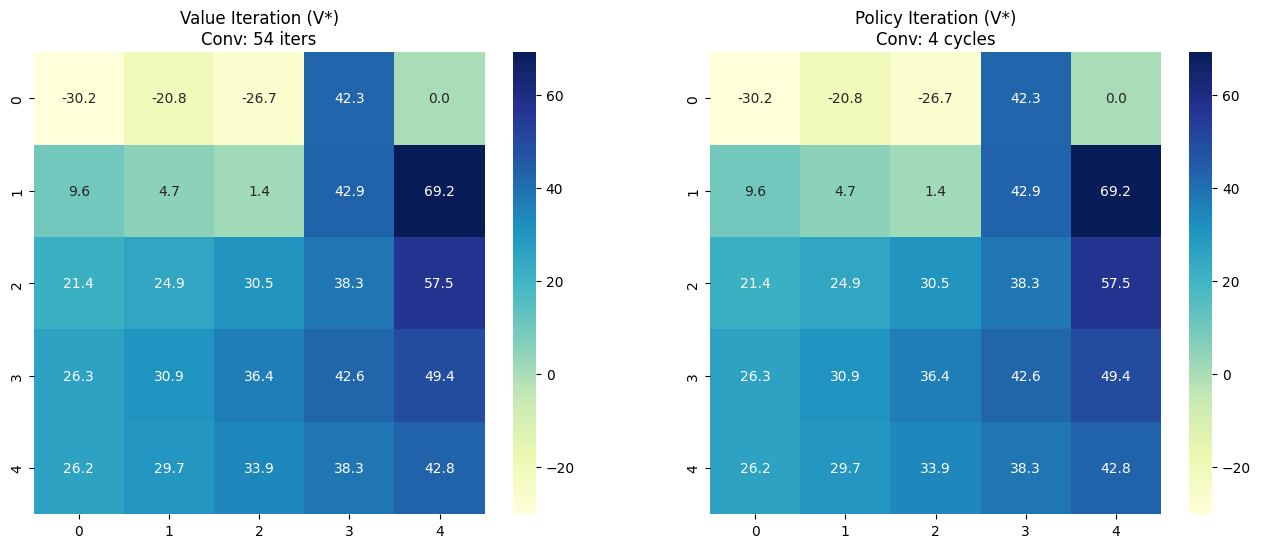

In [9]:
v_vi, it_vi = value_iteration()
v_pi, it_pi, pol_pi = policy_iteration()

print(f"Value Iteration convergé en {it_vi} itérations.")
print(f"Policy Iteration convergé en {it_pi} cycles politiques.")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(v_vi, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax[0])
ax[0].set_title(f"Value Iteration (V*)\nConv: {it_vi} iters")

sns.heatmap(v_pi, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax[1])
ax[1].set_title(f"Policy Iteration (V*)\nConv: {it_pi} cycles")
plt.show()

### Nouvelle modélisation : récompenses stochastiques

Dans cette version du MDP, la dynamique de transition reste stochastique,
mais la récompense devient également aléatoire.

Autrement dit, on ne modélise plus uniquement
$$
P(s' \mid s,a),
$$
mais directement la loi jointe
$$
p(r,s' \mid s,a).
$$

Pour une transition donnée vers un état $s'$, plusieurs valeurs de récompense
peuvent être possibles, chacune associée à une probabilité conditionnelle :

$$
P(r \mid s,a,s').
$$

Ainsi, l’équation de Bellman devient :

$$
\sum_{s'} \sum_r
p(r,s' \mid s,a)
\left[
r + \gamma V(s')
\right].
$$

Dans l’implémentation, cela se traduit par plusieurs triplets
$(p, s', r)$ pour une même transition vers $s'$,
ce qui permet de calculer exactement l’espérance sans recours au sampling.

In [11]:
# Modification de la focntion get transition pour introduire une probabilité de succès 
# et des récompenses stochastiques, afin de rendre l'environnement plus réaliste et 
# de moins simplifier les équations de Bellman. 

def get_transitions(s, a_idx):

    reward_proba =  0.7

    if s == TERMINAL_STATE:
        return []

    legal_indices = get_legal_actions(s)
    res = []

    prob_success = PROBA_SUCCESS
    autres_valides = [i for i in legal_indices if i != a_idx]

    if not autres_valides:
        prob_success = 1.0

    prob_others = (1.0 - prob_success) / len(autres_valides) if autres_valides else 0

    for i in legal_indices:
        p_action = prob_success if i == a_idx else prob_others
        move = actions[i]
        nxt = (s[0] + move[0], s[1] + move[1])

        #  Distribution de récompense 
        if nxt == TERMINAL_STATE:
            reward_distribution = [(1.0, 100)]

        elif nxt in PIQUES:
            reward_distribution = [
                (reward_proba, -100),
                (1-reward_proba, -150)
            ]

        else:
            reward_distribution = [
                (reward_proba, -1),
                (1-reward_proba, -5)
            ]

        # On construit p(r, s' | s, a)
        for p_r, r in reward_distribution:
            res.append((p_action * p_r, nxt, r))
        
        

    return res

# Pour sélectionner l'une ou l'autre des modélisations, il faut simplment run en denrier la cellule 
# de la fonction get_transitions que l'on souhaite utiliser, 
# et les fonctions value_iteration() et policy_iteration() utiliseront automatiquement 
# la modélisation définie dans la dernière

Value Iteration convergé en 52 itérations.
Policy Iteration convergé en 4 cycles politiques.


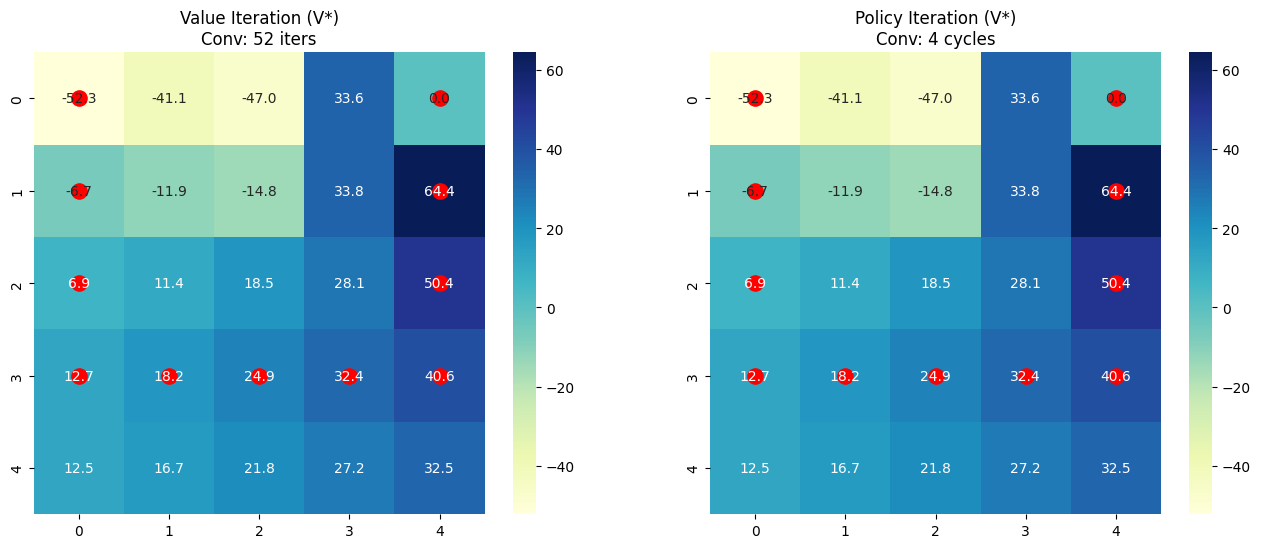

In [12]:
# On trace le meilleure chgemin déterministe à partir de la politique optimale extraite de V*
START = (0, 0)

# EXTRACTION DE POLITIQUE À PARTIR DE V 
def extract_policy_from_value(V):
    policy = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if (x, y) == TERMINAL_STATE:
                continue

            legal = get_legal_actions((x, y))

            q_values = [
                sum(
                    p * (rew + GAMMA * V[sn])
                    for p, sn, rew in get_transitions((x, y), a)
                )
                for a in legal
            ]

            best_action = legal[np.argmax(q_values)]
            policy[x, y] = best_action

    return policy


def get_optimal_path(policy, start):
    path = [start]
    s = start

    while s != TERMINAL_STATE:
        a = policy[s]
        move = actions[a]
        s = (s[0] + move[0], s[1] + move[1])
        path.append(s)

        if len(path) > 50:  # sécurité anti-boucle
            break

    return path


v_vi, it_vi = value_iteration()
v_pi, it_pi, pol_pi = policy_iteration()

pol_vi = extract_policy_from_value(v_vi)

print(f"Value Iteration convergé en {it_vi} itérations.")
print(f"Policy Iteration convergé en {it_pi} cycles politiques.")


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Heatmaps
sns.heatmap(v_vi, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax[0])
ax[0].set_title(f"Value Iteration (V*)\nConv: {it_vi} iters")

sns.heatmap(v_pi, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax[1])
ax[1].set_title(f"Policy Iteration (V*)\nConv: {it_pi} cycles")

path_vi = get_optimal_path(pol_vi, START)
path_pi = get_optimal_path(pol_pi, START)

for (r, c) in path_vi:
    ax[0].scatter(c + 0.5, r + 0.5, color='red', s=120)

for (r, c) in path_pi:
    ax[1].scatter(c + 0.5, r + 0.5, color='red', s=120)

plt.show()

### Commentaire sur les résultats

L’introduction d’une dynamique stochastique (probabilité de glisser vers une autre action)
modifie significativement la politique optimale.

En particulier, le risque de dévier vers une case "pique" pousse l’agent à
s’écarter davantage des zones dangereuses.  
Même si un chemin est plus court en nombre d’étapes, il peut être évité
s’il présente une probabilité non négligeable de transition vers une
récompense fortement négative.

Ainsi :

- augmenter le risque d’échec (diminuer PROBA_SUCCESS)
  conduit à des trajectoires plus prudentes,
- augmenter la pénalité des piques renforce cet effet,
- modifier le facteur d’actualisation $\gamma$ influence le compromis
  entre sécurité long terme et gain immédiat.

Concernant la récompense stochastique :

elle ne modifie pas nécessairement la structure du chemin optimal,
mais elle modifie la valeur espérée des états.
Autrement dit, la politique optimale dépend de l’espérance des récompenses,
pas de leur variance.

On pourrait définir une structure de récompense plus complexe
(dépendante du contexte, de l’historique, ou du risque),
mais cela ne changerait pas l’implémentation des algorithmes :
seule la loi $p(r,s' \mid s,a)$ serait modifiée.

### Remarque sur la politique

Dans cette implémentation, la politique est déterministe :
pour chaque état $s$, une unique action $a = \pi(s)$ est sélectionnée.

Il s’agit du cas le plus simple et le plus courant en programmation dynamique,
car l’optimalité conduit naturellement à une politique déterministe :
$$
\pi^*(s) = \arg\max_{a \in \mathcal{A}(s)} q^*(s,a).
$$

Cependant, il serait possible de considérer une politique stochastique,
par exemple de type $\varepsilon$-greedy :

$$
\pi(a \mid s) =
\begin{cases}
1 - \varepsilon + \frac{\varepsilon}{|\mathcal{A}(s)|} & \text{si } a = a^*, \\
\frac{\varepsilon}{|\mathcal{A}(s)|} & \text{sinon},
\end{cases}
$$

où $a^*$ est l’action maximisante.

Dans ce cas, l’équation de Bellman pour $V_\pi$ ferait réapparaître
une somme sur les actions :

$$
V_\pi(s)
=
\sum_{a \in \mathcal{A}(s)}
\pi(a \mid s)
\sum_{s',r}
p(r,s' \mid s,a)
\left[
r + \gamma V_\pi(s')
\right].
$$

Cela ne modifierait pas la structure des algorithmes,
mais impliquerait de pondérer les $q(s,a)$
par les probabilités de la politique.